🟢Linear Regression Model - Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/abedi/OneDrive/Desktop/MachineLearningModel_LinearRegression/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.shape

(205, 26)

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

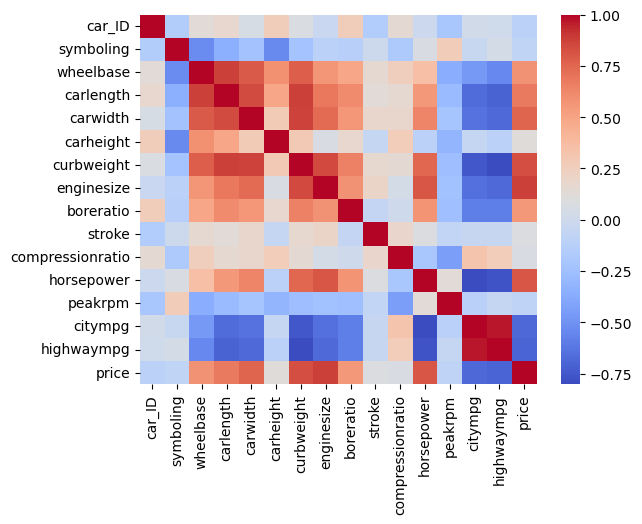

In [8]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=True)

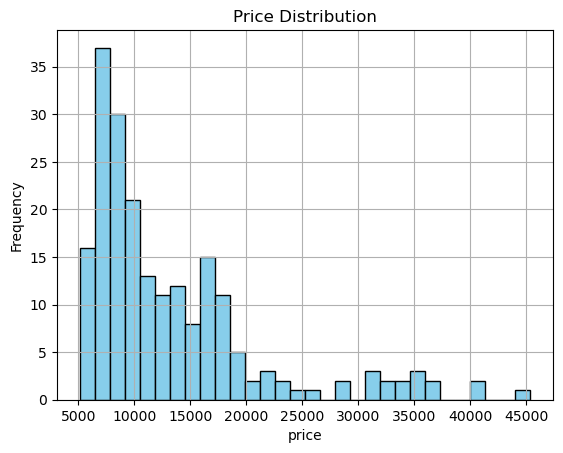

In [9]:
df['price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

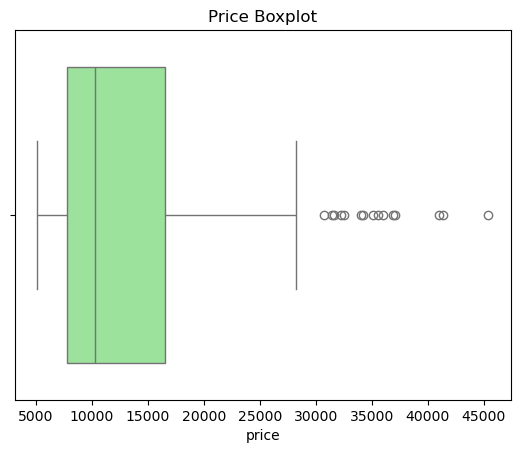

In [10]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Price Boxplot')
plt.show()

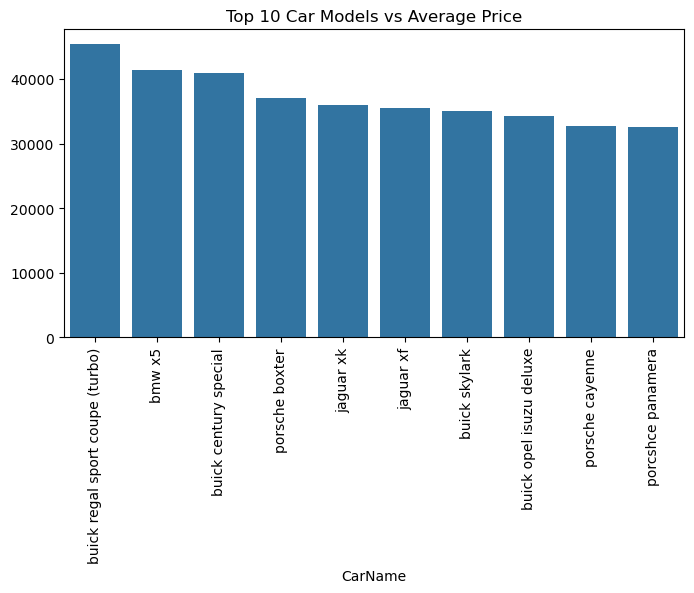

In [11]:
car_price_mean = df.groupby('CarName')['price'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 car models
plt.figure(figsize=(8, 4))
sns.barplot(x=car_price_mean.index, y=car_price_mean.values)
plt.xticks(rotation=90)
plt.title('Top 10 Car Models vs Average Price')
plt.show()

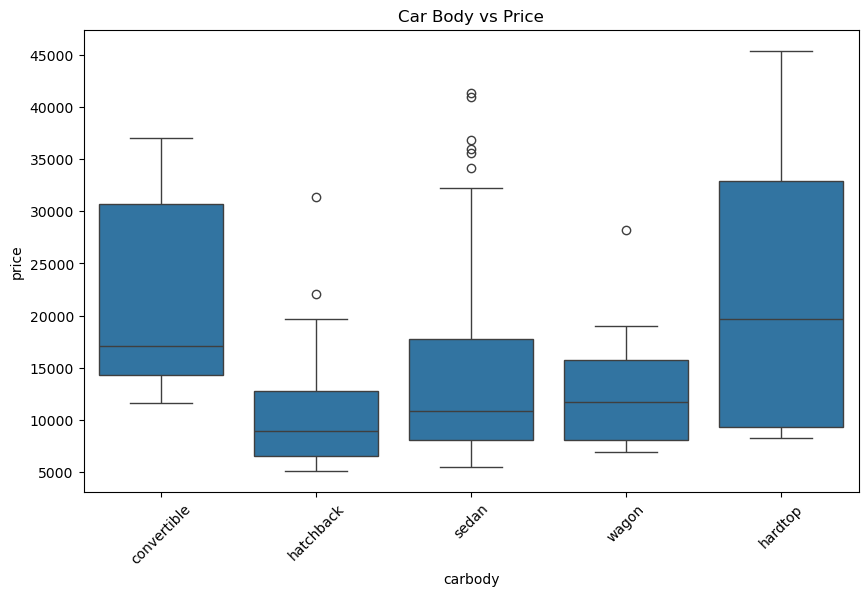

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['carbody'], y=df['price'])
plt.xticks(rotation=45)
plt.title('Car Body vs Price')
plt.show()

In [13]:
df.duplicated().sum()
df.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 
                                 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], drop_first=True)
# Label Encoding for 'cylindernumber' (it's treated as ordinal)
le = LabelEncoder()
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])

df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0])  # Extract car brand
df['CarName'] = le.fit_transform(df['CarName'])  # If you want to keep it

df = pd.get_dummies(df, columns=['CarBrand'], drop_first=True)

In [15]:
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,1,3,2,88.6,168.8,64.1,48.8,2548,2,130,...,False,False,False,False,False,False,False,False,False,False
1,2,3,3,88.6,168.8,64.1,48.8,2548,2,130,...,False,False,False,False,False,False,False,False,False,False
2,3,1,1,94.5,171.2,65.5,52.4,2823,3,152,...,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,2,109,...,False,False,False,False,False,False,False,False,False,False
4,5,2,5,99.4,176.6,66.4,54.3,2824,1,136,...,False,False,False,False,False,False,False,False,False,False


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical columns for scaling (e.g., all columns except for the categorical ones)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
# Identify outliers in 'price' using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

Model Training

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
# training the model using training data
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

Evaluate the Model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.1346890902761289
Mean Squared Error: 0.0329787060391422
Root Mean Squared Error: 0.18160040208970407
R-squared: 0.8753985802018274


Visualizations

1. Actual vs Predicted Plot:

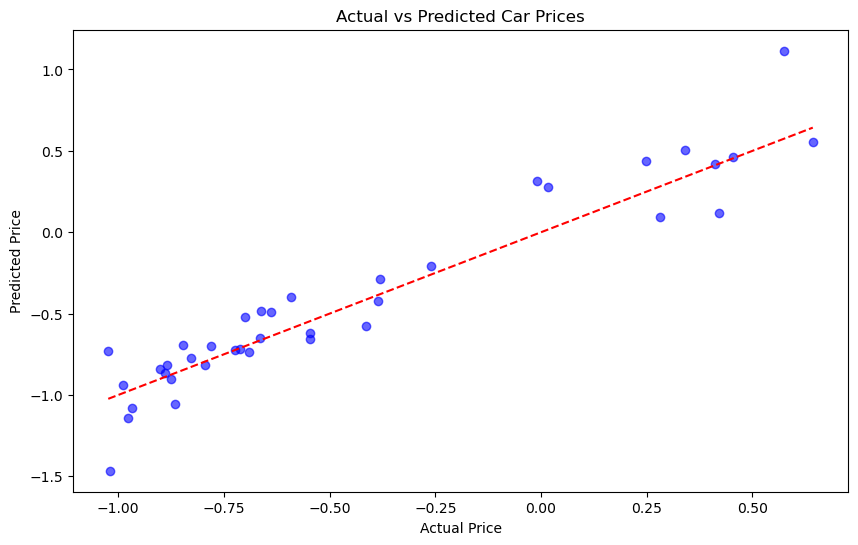

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

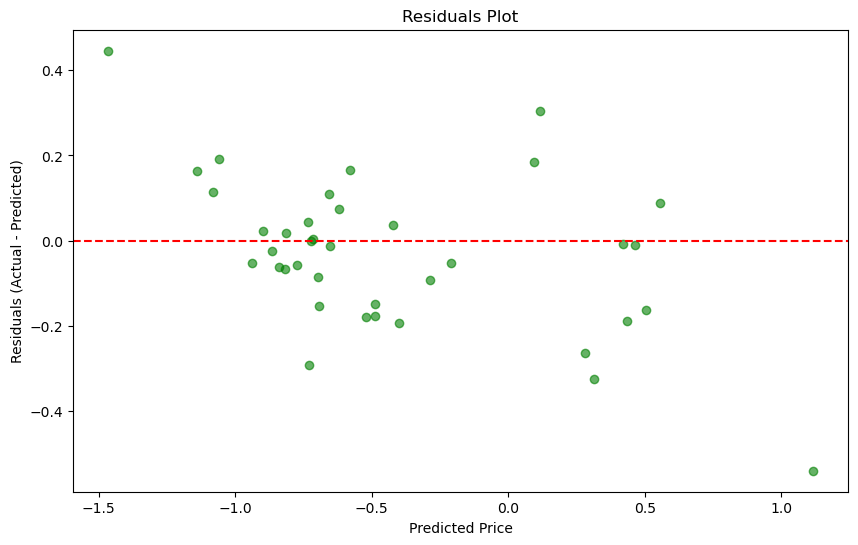

In [24]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

3. Distribution of Residuals:

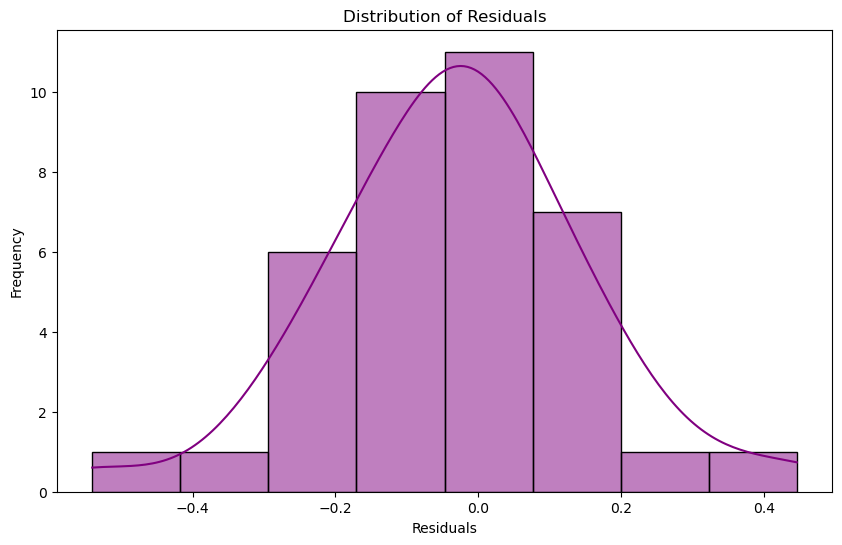

In [25]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

4. Learning Curve:

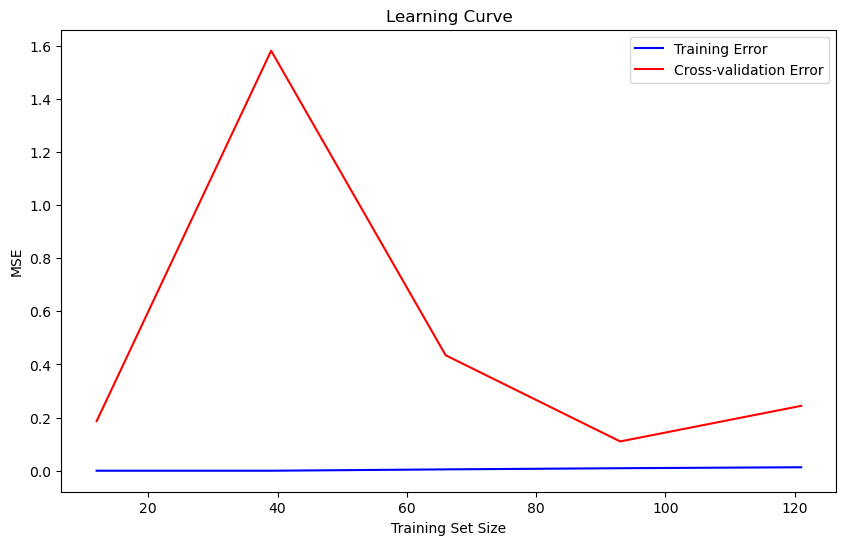

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculate mean and standard deviation for training and testing
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation Error', color='red')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

5. Model Performance Metrics Bar Chart:

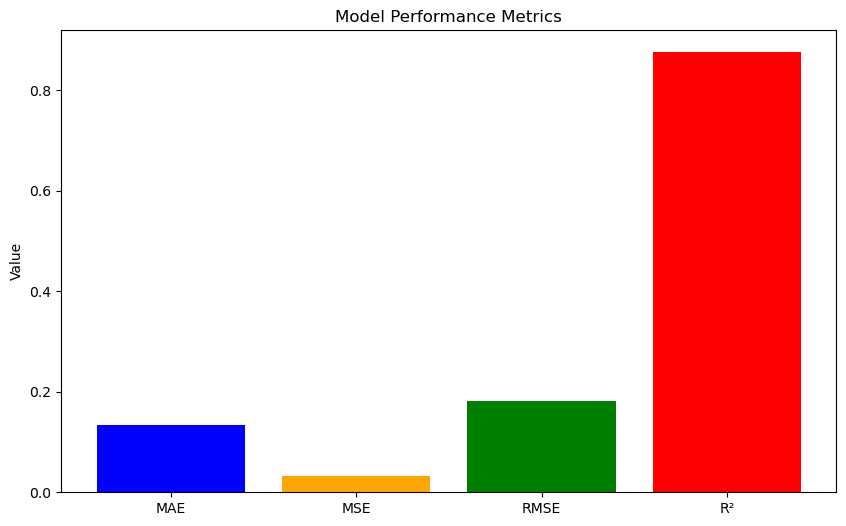

In [27]:
metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R²': r2_score(y_test, y_pred)
}

# Plot the metrics
plt.figure(figsize=(10,6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()